# Тема 3. Визуализация данных

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import seaborn as sns
import pandas as pd
import math as mt
import plotly.express as px

In [3]:
rng = np.random.default_rng(42)

### 1 Задание

Построить на одном графике графики плотностей $\mathcal{N}(0, k), k = 1, \ldots, n$ (например, для $n = 5$).

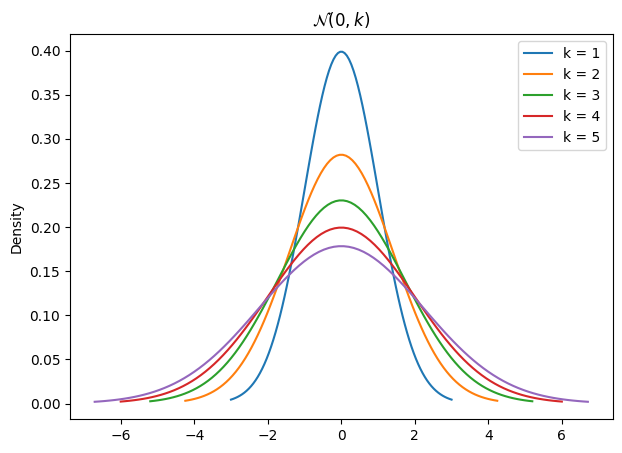

In [4]:
fig, ax = plt.subplots()
fig.set_figwidth(7)
fig.set_figheight(5)

N = 5
for k in range(1, N + 1):
    std = mt.sqrt(k)
    x = np.linspace(-3*std, 3*std, 100)
    ax.plot(x, st.norm.pdf(x, 0, std), label=f"k = {k}")

ax.set_ylabel("Density")
ax.legend()
ax.set_title(r"$\mathcal{N}(0, k)$")
plt.show()

### 2 Задание

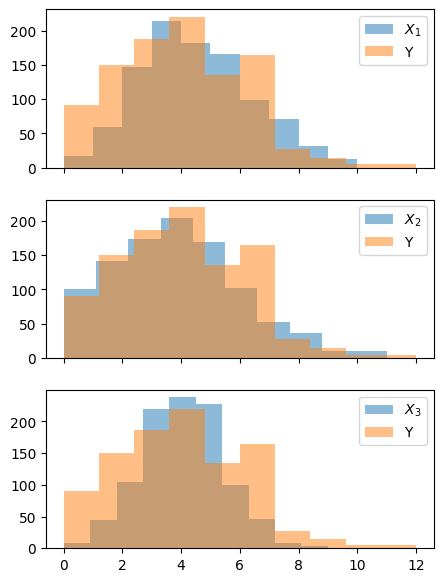

In [6]:
SZ = 1_000
x = np.array([
    rng.binomial(100, 0.04, SZ),
    rng.binomial(1000, 0.004, SZ),
    rng.binomial(10, 0.4, SZ)
])
y = rng.poisson(4, SZ)

fig, ax = plt.subplots(3, 1, sharex=True)
fig.set_figwidth(5)
fig.set_figheight(7)

for i in range(3):
    ax[i].hist(x[i], alpha=0.5, label=fr"$X_{i+1}$")
    ax[i].hist(y, alpha=0.5, label=f"Y")
    ax[i].legend()
plt.show()

### 3 Задание

In [5]:
df = pd.read_csv('../2-DataFrame/Priem.csv', encoding='utf-8')
df.head(3)

,Пол,Сумма.баллов,ЕГЭ...матем.,ЕГЭ...рус.яз.,Аттестат.с.отличием.оценка,ГТО.оценка,Сочинение.оценка,Регион,Тип.насел..пункта,Дата.рождения,День.рождения,Месяц.рождения
0,МУЖСКОЙ,388,90.0,98.0,5,0,1,Красноярский край,ГОРОД,24.09.1998,24,9
1,ЖЕНСКИЙ,351,84.0,87.0,0,0,2,Чувашская Респ,ЦЕНТР СУБЪЕКТА ФЕДЕРАЦИИ,14.02.1997,14,2
2,ЖЕНСКИЙ,355,94.0,91.0,5,0,2,Москва г,ГОРОД ФЕДЕРАЛЬНОГО ЗНАЧЕНИЯ,25.03.2000,25,3


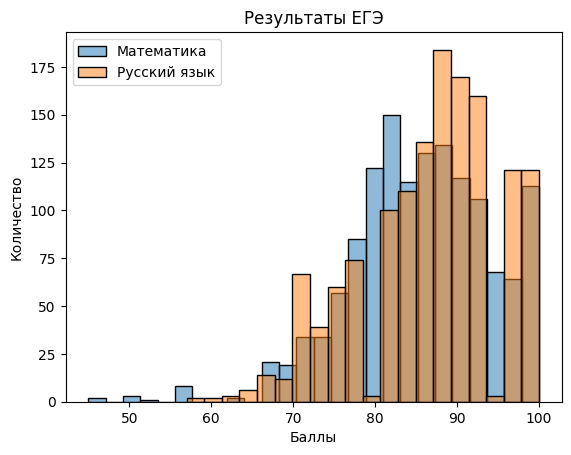

In [6]:
ax = sns.histplot(data=df, x="ЕГЭ...матем.", alpha=0.5, label="Математика");
sns.histplot(data=df, x="ЕГЭ...рус.яз.", alpha=0.5, label="Русский язык");
ax.set(xlabel='Баллы', ylabel='Количество', title='Результаты ЕГЭ');
plt.legend();

### 4 Задание

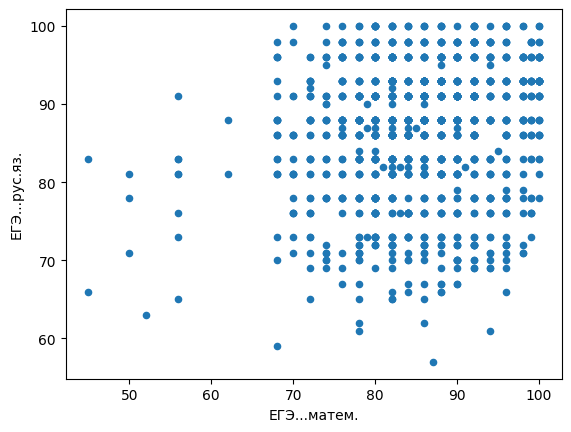

In [7]:
df.plot.scatter(x="ЕГЭ...матем.", y="ЕГЭ...рус.яз.");

### 5 Задание

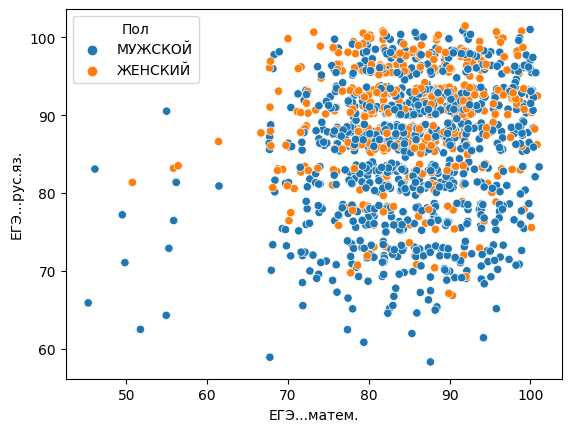

In [8]:
sns.scatterplot(
    data=df,
    x=df["ЕГЭ...матем."]+rng.normal(0, 0.5, df.shape[0]), 
    y=df["ЕГЭ...рус.яз."]+rng.normal(0, 0.5, df.shape[0]), 
    hue="Пол"
);

### 6 Задание

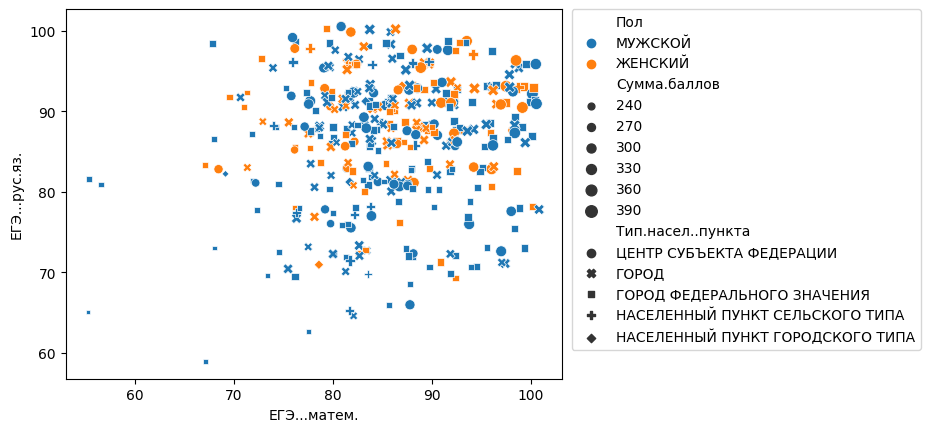

In [14]:
N = 400
df6 = df.sample(N)
ax = sns.scatterplot(
    data=df6,
    x=df6["ЕГЭ...матем."] + rng.normal(0, 0.5, N), 
    y=df6["ЕГЭ...рус.яз."] + rng.normal(0, 0.5, N),
    hue="Пол",
    style="Тип.насел..пункта", 
    size="Сумма.баллов"
);
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);

### 7 Задание

In [10]:
tp = pd.read_csv("tips.csv")
tp.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


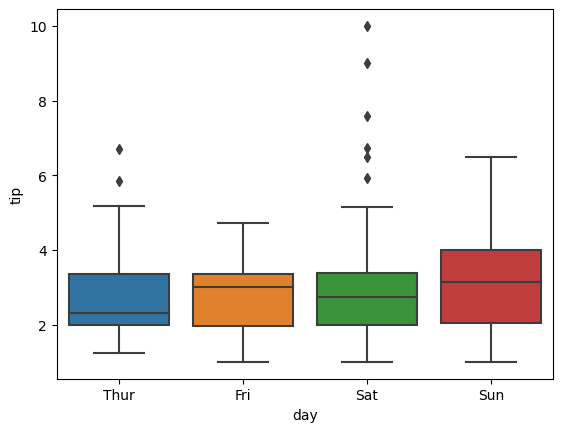

In [11]:
ax = sns.boxplot(
    data=tp,
    y='tip',
    x='day',
    order=['Thur', 'Fri', 'Sat', 'Sun']
);

### 8 Задание

In [12]:
tit = pd.read_csv("titanic.csv").sample(100)
tit.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
754,1,2,female,48.0,1,2,65.0000,S,Second,woman,False,NaN,Southampton,yes,False
565,0,3,male,24.0,2,0,24.1500,S,Third,man,True,NaN,Southampton,no,False
519,0,3,male,32.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True


In [26]:
fig = px.parallel_coordinates(
    tit,
    dimensions=[
        'survived',
        tit['pclass'] + rng.normal(0, 0.1, tit.shape[0]),
        tit['who'].apply(lambda b: 1 if b == 'man' else 0) + rng.normal(0, 0.05, tit.shape[0]),
        'age'
    ],
    labels={
        'dimensions_1': 'pclass',
        'dimensions_2': 'sex'
    },
    color='survived',
    color_continuous_scale=['red', 'green'],
)
fig.show(renderer="iframe")